In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

In [3]:
df = pd.read_csv("resignations.csv")

In [4]:
df.PM.value_counts()

May         41
Blair       29
Thatcher    26
Major       23
Brown       17
Cameron     15
Name: PM, dtype: int64

In [5]:
df['Year'] = df.Date.str.extract(".*/(\d{4})$", expand=False)

In [6]:
df.head()

,PM,Surname,Post,Date,Reason,Type,Link,Cabinet?,Year
0,Thatcher,Speed,Defence,18/5/1981,Chose not to resign over opposition to Navy cuts,Sacked,https://en.wikipedia.org/wiki/Keith_Speed,NaN,1981
1,Thatcher,Fairbairn,Solicitor Gen (Scot),21/01/1982,Handling of a Scottish prosecution,Standards,https://www.margaretthatcher.org/document/104858,NaN,1982
2,Thatcher,Oppenheim,Trade,05/03/1982,Personal - death of husband,Personal/other,https://www.margaretthatcher.org/document/104871,NaN,1982
3,Thatcher,Carrington,Foreign Office,05/04/1982,Falklands,Accountability,https://www.margaretthatcher.org/document/104911,Y,1982
4,Thatcher,Atkins,Lord Privy Seal,05/04/1982,Falklands,Accountability,https://www.margaretthatcher.org/document/104911,Y,1982


In [7]:
df.Type.value_counts()

Personal/other    57
Disagreement      48
Standards         20
Unclear            9
Pre-announced      8
Accountability     5
Sacked             2
Temporary          1
Pre-arranged       1
Name: Type, dtype: int64

In [8]:
df.Year.value_counts().head(10)

2019    16
2018    16
2009    12
2017     8
1995     8
2014     8
1982     6
2003     5
1994     5
1990     5
Name: Year, dtype: int64

In [9]:
# df['Year'] = df.Year.astype(int)

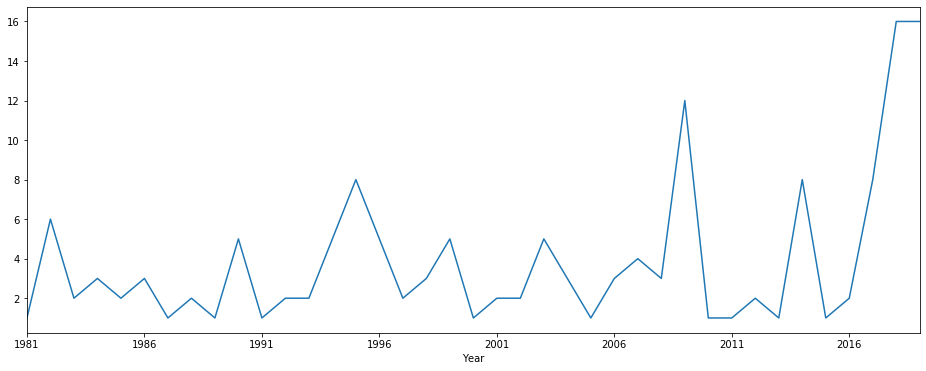

In [10]:
df.sort_values(by='Year').groupby('Year').size().plot(figsize=(16,6))
plt.savefig("year.pdf")

In [11]:
 df.groupby('PM').Type.value_counts()

PM        Type          
Blair     Personal/other    17
          Disagreement       8
          Standards          2
          Accountability     1
          Unclear            1
Brown     Personal/other     6
          Disagreement       5
          Pre-announced      4
          Standards          1
          Unclear            1
Cameron   Personal/other     6
          Standards          4
          Disagreement       3
          Accountability     1
          Pre-arranged       1
Major     Personal/other     9
          Standards          6
          Unclear            4
          Disagreement       3
          Pre-announced      1
May       Disagreement      24
          Personal/other     7
          Standards          5
          Pre-announced      3
          Sacked             1
          Temporary          1
Thatcher  Personal/other    12
          Disagreement       5
          Accountability     3
          Unclear            3
          Standards          2
          Sack

In [12]:
df2 = df.groupby(['PM','Type']).size().unstack()
df2

Type,Accountability,Disagreement,Personal/other,Pre-announced,Pre-arranged,Sacked,Standards,Temporary,Unclear
PM,,,,,,,,,
Blair,1.0,8.0,17.0,NaN,NaN,NaN,2.0,NaN,1.0
Brown,NaN,5.0,6.0,4.0,NaN,NaN,1.0,NaN,1.0
Cameron,1.0,3.0,6.0,NaN,1.0,NaN,4.0,NaN,NaN
Major,NaN,3.0,9.0,1.0,NaN,NaN,6.0,NaN,4.0
May,NaN,24.0,7.0,3.0,NaN,1.0,5.0,1.0,NaN
Thatcher,3.0,5.0,12.0,NaN,NaN,1.0,2.0,NaN,3.0


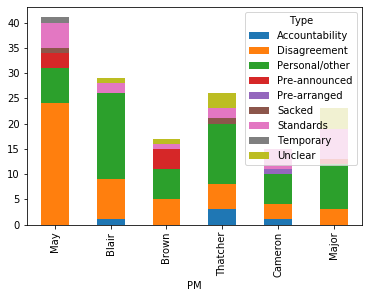

In [13]:
df2.sort_values(by='Disagreement',ascending=False).plot(y=['Accountability', 'Disagreement', 'Personal/other', 'Pre-announced', 'Pre-arranged', 'Sacked', 'Standards', 'Temporary', 'Unclear'], kind='bar', stacked=True)

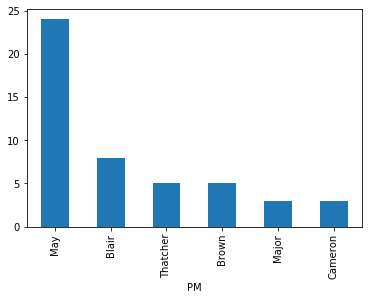

In [18]:
df2.Disagreement.sort_values(ascending=False).plot(kind='bar')